#**Assignment #1. OpenCV Tutorial** [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_01_intro_to_CV_and_Python/OpenCV_tutorial.ipynb)

OpenCV (Open Source Computer Vision Library) The OpenCV project was initially an Intel Research initiative to advance CPU-intensive applications. Officially launched in 1999. OpenCV is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.
[https://opencv.org/about/]

**Free OpenCV course**: https://opencv.org/university/free-opencv-course/?utm_source=opcv&utm_medium=menu&utm_campaign=obc

**More OpenCV functions**: https://github.com/BhanuPrakashNani/Image_Processing

In [1]:
import cv2  # opencv for python package
import matplotlib.pyplot as plt
import os

In [6]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

#change the directory
os.chdir('/content/drive/MyDrive/Digital Image Processing/Assignment1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **PartA. Read and Plot an Image**

1. Read and plot an image with OpenCV.

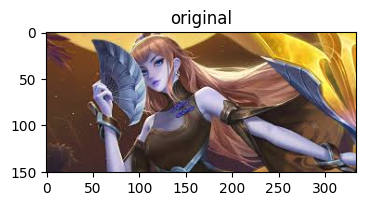

In [7]:
img=cv2.imread("image.jpg")
plt.figure(figsize=(4,8))
plt.imshow(img)
plt.title("original")
plt.show()

We got a weird image colors... This is because OpenCV uses image reading convention of BGR and matplotlib uses RGB.

The fix is easy:




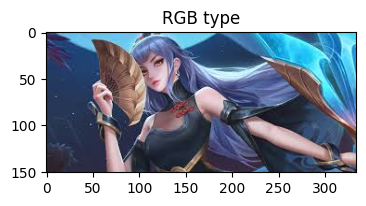

<class 'numpy.ndarray'>
(151, 334, 3)


In [8]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,8))
plt.imshow(img)
plt.title("RGB type")
plt.show()

# some image info:
print(type(img))
print(img.shape)

2. Show the channels of a color image. A color image contains R, G, B channels. Learn to show each channel.

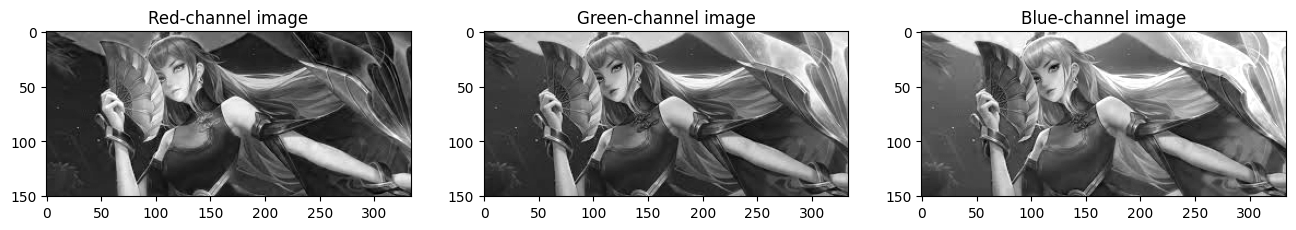

In [11]:
# show the R, G, and B channels
fig,ax_arr=plt.subplots(1,3,figsize=(16,4))
ax_arr[0].imshow(img[:,:,0],cmap='gray')
ax_arr[0].set_title("Red-channel image")
ax_arr[1].imshow(img[:,:,1],cmap='gray')
ax_arr[1].set_title("Green-channel image")
ax_arr[2].imshow(img[:,:,2],cmap='gray')
ax_arr[2].set_title("Blue-channel image")
plt.show()

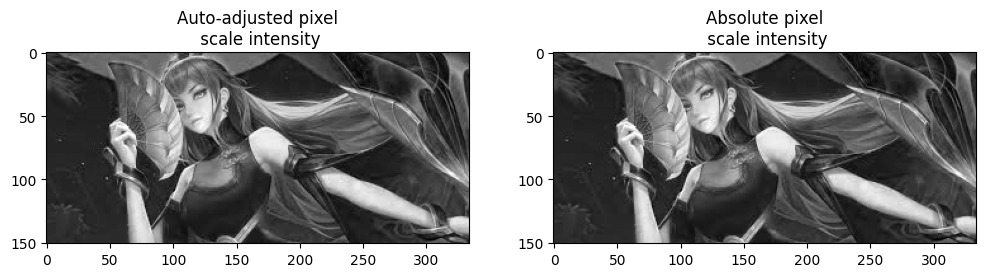

In [16]:
# gray color-mapping
fig,ax_arr=plt.subplots(1,2,figsize=(12,4))

ax_arr[0].imshow(img[:,:,0], cmap="gray")
ax_arr[0].set_title("Auto-adjusted pixel\n scale intensity")

ax_arr[1].imshow(img[:,:,0], cmap="gray", vmin=0, vmax=255)
ax_arr[1].set_title("Absolute pixel\n scale intensity")
plt.show()

### **Part B. Advanced Image Processing Functions**

1. **Image blurring**. Apply an average filtering to the image.
2. **Edge detection.**. Apply Canny edge decteion to the image.
3. **Circle detection**. Apply Hough transform to the image.


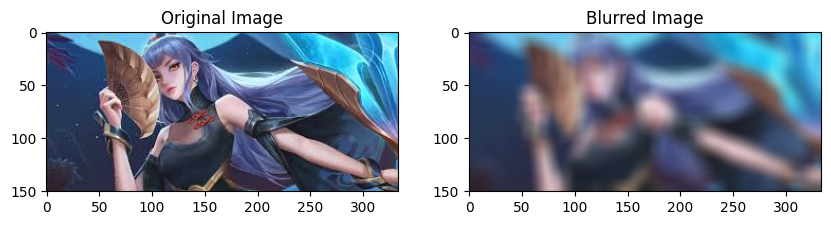

In [17]:
# image blurring
img_blurred=cv2.blur(img,(15,15))  # use a 15x15 average kernel
fig,ax_arr=plt.subplots(1, 2, figsize=(10,5))
ax_arr[0].imshow(img)
ax_arr[0].set_title("Original Image")
ax_arr[1].imshow(img_blurred)
ax_arr[1].set_title("Blurred Image")
plt.show()

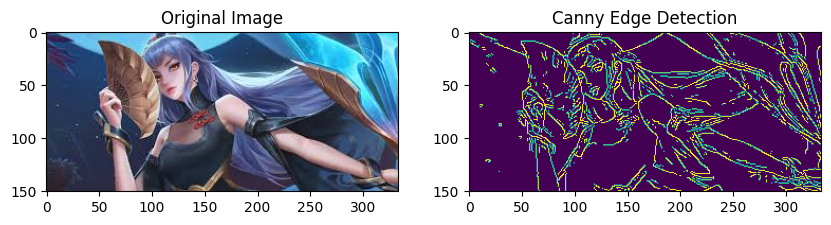

In [18]:
# edge detection
img_canny=cv2.Canny(img,180,200)  # end args are the lower & upper TH of hysteresis

fig,ax_arr=plt.subplots(1, 2, figsize=(10,10))
ax_arr[0].imshow(img)
ax_arr[0].set_title("Original Image")
ax_arr[1].imshow(img_canny)
ax_arr[1].set_title("Canny Edge Detection")
plt.show()

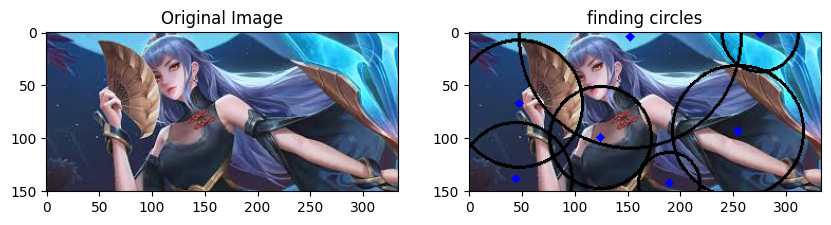

In [27]:
# detect circles
# img_logo=cv2.imread("Opencv_logo.png")
# img_logo=cv2.cvtColor(img_logo, cv2.COLOR_BGR2RGB)
img=cv2.imread("image.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

fig,ax_arr=plt.subplots(1, 2, figsize=(10,10))
ax_arr[0].imshow(img)
# ax_arr[0].set_title("OpenCV Logo")
ax_arr[0].set_title("Original Image")

img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
circles=cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 0.1, 70, param1=50, param2=38)
for x, y, r in circles[0, :]:
    # draw the outer circle
    cv2.circle(img, (int(x), int(y)), int(r), (0, 0, 0), 2)
    # draw the center of the circle
    cv2.circle(img, (int(x), int(y)), 2, (0, 0, 255), 3)

ax_arr[1].imshow(img)
ax_arr[1].set_title("finding circles")
plt.show()

### **Part C. Basic Image Processing Implementation**
Implement the following image processing functions  using CV2 with the aids of Germini.

*   Image thresholding
*   Image histogram



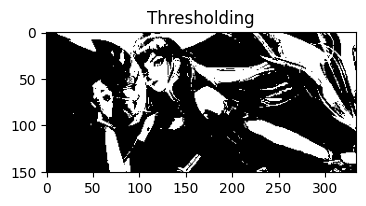

In [29]:
# Image thresholding
img=cv2.imread("image.jpg")
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply thresholding
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)  # 如果大於 127 就等於 255，反之等於 0。

# show the image
plt.figure(figsize=(4,8))
plt.imshow(thresh1, cmap="gray")
plt.title("Thresholding")
plt.show()

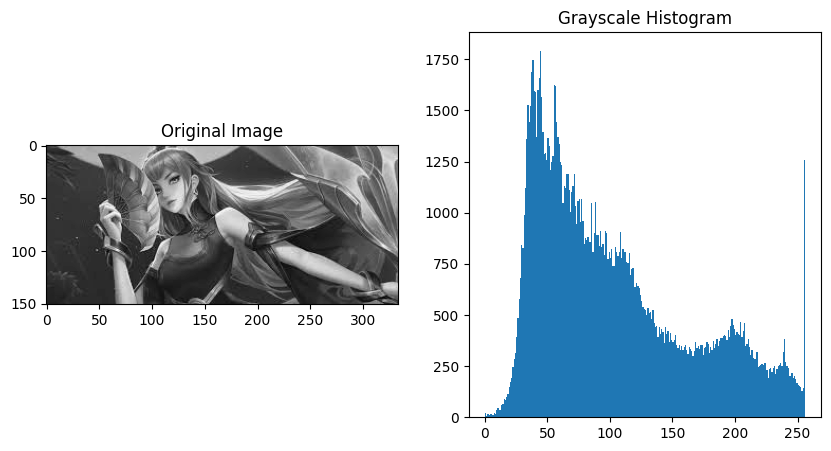

In [30]:
# Image histogram
img=cv2.imread("image.jpg")
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# calculate histogram
# hist = cv2.calcHist([img], [0], None, [256], [0, 256])

fig,ax_arr=plt.subplots(1, 2, figsize=(10,5))
ax_arr[0].imshow(img_gray, cmap="gray")
ax_arr[0].set_title("Original Image")
ax_arr[1].hist(img.ravel(), 256, [0, 256])
ax_arr[1].set_title("Grayscale Histogram")
plt.show()